## 1. Introduction/Business Problem

Chicago saw a major rise in violent crime starting in the late 1960s. Murders in the city peaked in 1974, with 970 murders when the city's population was over three million, resulting in a murder rate of around 29 per 100,000, and again in 1992, with 943 murders when the city had fewer than three million people, resulting in a murder rate of 34 murders per 100,000 citizen. 
Chicago reduced a murder rate in 2018. The municipal authorities want to keep this trend. 
They outsourced to prepare a report which is to identify crime patterns in Chicago. 

The report should provide answers for below questions including difference between overall crimes and homicides:
* When crimes are committed? 
* Which community areas are the most dangerous? (crimes per 1000 inhabitants)
* Are police departments properly located? (Foursquare location)



## 2. Data

The sources of data are official  websites: https://data.cityofchicago.org and https://www.chicago.gov

Finally two tables were created:
* total - containing all crimes
* homicide - containing this kind of crime

Both tables consist of 15 columns which determine:
* time of crime - Season, Part of the day
* place of crime - Block, Location description,Longitude, Latitude, Community Area, Community Area Description, 
* crime classification - Case number, Primary Type, Arrest
* police assignment - Beat, District

In [1]:
import pandas as pd 
import numpy as np

pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.max_rows', None) # Show all rows

# Download crime table - more information on website : https://data.cityofchicago.org/Public-Safety/Crimes-2018/3i3m-jwuy

crime = pd.read_csv('https://data.cityofchicago.org/api/views/3i3m-jwuy/rows.csv?accessType=DOWNLOAD')

crime = crime.drop(['ID','IUCR','Ward','FBI Code','X Coordinate','Y Coordinate','Year','Updated On','Location','Historical Wards 2003-2015',
              'Zip Codes','Community Areas','Census Tracts','Wards','Boundaries - ZIP Codes','Police Districts','Police Beats','Domestic'],axis=1) 

crime['Location Description'].fillna("OTHER",inplace=True) #populate missing Location Descriptions

crime.head()

,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,Community Area,Latitude,Longitude
0,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,2211,22,74.0,41.689079,-87.696064
1,JC110056,12/31/2018 11:59:00 PM,013XX W 72ND ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,734,7,67.0,41.763181,-87.657709
2,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,613,6,71.0,41.740521,-87.647391
3,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,1233,12,31.0,41.857068,-87.657625
4,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,621,6,71.0,41.751914,-87.647717


In [2]:
crime.shape

(267539, 12)

In [3]:
#Download population table

population = pd.read_csv('https://raw.githubusercontent.com/piotr-ek7/Coursera_Capstone/master/Population.csv',error_bad_lines=False) #source: https://www.chicago.gov/city/en/depts/dcd/supp_info/community_area_2000and2010censuspopulationcomparisons.html
population.columns =['Community Area','Community Area Description','Community Area Population'] #rename columns
population.head()

,Community Area,Community Area Description,Community Area Population
0,1,Rogers Park,54991
1,2,West Ridge,71942
2,3,Uptown,56362
3,4,Lincoln Square,39493
4,5,North Center,31867


In [4]:
df = pd.merge(crime,population,on='Community Area',how="left") #join crime and population tables
df.head()

,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,Community Area,Latitude,Longitude,Community Area Description,Community Area Population
0,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,2211,22,74.0,41.689079,-87.696064,Mount Greenwood,19093.0
1,JC110056,12/31/2018 11:59:00 PM,013XX W 72ND ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,734,7,67.0,41.763181,-87.657709,West Englewood,35505.0
2,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,613,6,71.0,41.740521,-87.647391,Auburn Gresham,48743.0
3,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,1233,12,31.0,41.857068,-87.657625,Lower West Side,35769.0
4,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,621,6,71.0,41.751914,-87.647717,Auburn Gresham,48743.0


In [5]:
#Assignng a given season based on Date
month = df['Date'].str[:2].astype('int32') #extract month
season=[]

for m in month:
    if m in range(3,6): season.append('Spring')
    elif m in range(6,9): season.append('Summer')
    elif m in range(9,12): season.append('Fall')
    else: season.append('Winter')

season = pd.DataFrame(season,columns=["Season"])
df = pd.merge(df,season,left_index=True,right_index=True)
df.head()

,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,Community Area,Latitude,Longitude,Community Area Description,Community Area Population,Season
0,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,2211,22,74.0,41.689079,-87.696064,Mount Greenwood,19093.0,Winter
1,JC110056,12/31/2018 11:59:00 PM,013XX W 72ND ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,734,7,67.0,41.763181,-87.657709,West Englewood,35505.0,Winter
2,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,613,6,71.0,41.740521,-87.647391,Auburn Gresham,48743.0,Winter
3,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,1233,12,31.0,41.857068,-87.657625,Lower West Side,35769.0,Winter
4,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,621,6,71.0,41.751914,-87.647717,Auburn Gresham,48743.0,Winter


In [6]:
#Assigning the part of day based on Date

hour = df['Date'].str[11:13] + df['Date'].str[-2:] #extract time
hours = [int(h[:2])+12 if h[-2:]=="PM" else int(h[:2]) for h in hour] #covert to 24h format

part_of_day=[]

for p in hours:
    if p in range(5,12): part_of_day.append('Morning')
    elif p in range(12,17): part_of_day.append('Afternoon')
    elif p in range(17,21): part_of_day.append('Evening')
    else: part_of_day.append('Night')
        
part_of_day = pd.DataFrame(part_of_day,columns=["Part of the day"])
df = pd.merge(df,part_of_day,left_index=True,right_index=True) 
df.head()

,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,Community Area,Latitude,Longitude,Community Area Description,Community Area Population,Season,Part of the day
0,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,2211,22,74.0,41.689079,-87.696064,Mount Greenwood,19093.0,Winter,Night
1,JC110056,12/31/2018 11:59:00 PM,013XX W 72ND ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,734,7,67.0,41.763181,-87.657709,West Englewood,35505.0,Winter,Night
2,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,613,6,71.0,41.740521,-87.647391,Auburn Gresham,48743.0,Winter,Night
3,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,1233,12,31.0,41.857068,-87.657625,Lower West Side,35769.0,Winter,Night
4,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,621,6,71.0,41.751914,-87.647717,Auburn Gresham,48743.0,Winter,Night


In [7]:
df = df[['Case Number','Season','Part of the day','Primary Type','Description','Block','Location Description','Arrest','Beat','District','Community Area','Community Area Description','Community Area Population','Latitude','Longitude']] #set a column order
df.head()

,Case Number,Season,Part of the day,Primary Type,Description,Block,Location Description,Arrest,Beat,District,Community Area,Community Area Description,Community Area Population,Latitude,Longitude
0,JC104662,Winter,Night,CRIMINAL DAMAGE,TO VEHICLE,112XX S SACRAMENTO AVE,STREET,False,2211,22,74.0,Mount Greenwood,19093.0,41.689079,-87.696064
1,JC110056,Winter,Night,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,013XX W 72ND ST,OTHER,False,734,7,67.0,West Englewood,35505.0,41.763181,-87.657709
2,JC100043,Winter,Night,CRIMINAL DAMAGE,TO PROPERTY,084XX S SANGAMON ST,APARTMENT,False,613,6,71.0,Auburn Gresham,48743.0,41.740521,-87.647391
3,JC100006,Winter,Night,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,018XX S ALLPORT ST,OTHER,True,1233,12,31.0,Lower West Side,35769.0,41.857068,-87.657625
4,JC100031,Winter,Night,BATTERY,DOMESTIC BATTERY SIMPLE,078XX S SANGAMON ST,APARTMENT,False,621,6,71.0,Auburn Gresham,48743.0,41.751914,-87.647717


In [8]:
total = df.dropna(how="any", inplace=False) #clean missing data
total = total.reset_index(drop=True)
total['Community Area Population']= total['Community Area Population'].astype('int32')
total['Community Area']= total['Community Area'].astype('int32')
# Final Data Table
total.head()

,Case Number,Season,Part of the day,Primary Type,Description,Block,Location Description,Arrest,Beat,District,Community Area,Community Area Description,Community Area Population,Latitude,Longitude
0,JC104662,Winter,Night,CRIMINAL DAMAGE,TO VEHICLE,112XX S SACRAMENTO AVE,STREET,False,2211,22,74,Mount Greenwood,19093,41.689079,-87.696064
1,JC110056,Winter,Night,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,013XX W 72ND ST,OTHER,False,734,7,67,West Englewood,35505,41.763181,-87.657709
2,JC100043,Winter,Night,CRIMINAL DAMAGE,TO PROPERTY,084XX S SANGAMON ST,APARTMENT,False,613,6,71,Auburn Gresham,48743,41.740521,-87.647391
3,JC100006,Winter,Night,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,018XX S ALLPORT ST,OTHER,True,1233,12,31,Lower West Side,35769,41.857068,-87.657625
4,JC100031,Winter,Night,BATTERY,DOMESTIC BATTERY SIMPLE,078XX S SANGAMON ST,APARTMENT,False,621,6,71,Auburn Gresham,48743,41.751914,-87.647717


In [9]:
total.shape # 1.5% of data were romoved because of missing coordinates

(263425, 15)

In [10]:
# Final Data Table for Homicide

homicide = total[total['Primary Type']=='HOMICIDE']
homicide.head()

,Case Number,Season,Part of the day,Primary Type,Description,Block,Location Description,Arrest,Beat,District,Community Area,Community Area Description,Community Area Population,Latitude,Longitude
314,JB573872,Winter,Afternoon,HOMICIDE,FIRST DEGREE MURDER,002XX W 95TH ST,STREET,False,634,6,49,Roseland,44619,41.721658,-87.628972
428,JB573562,Winter,Morning,HOMICIDE,FIRST DEGREE MURDER,003XX E 53RD ST,STREET,True,231,2,40,Washington Park,11717,41.798450,-87.616858
1098,JB572372,Winter,Morning,HOMICIDE,FIRST DEGREE MURDER,066XX S LAFLIN ST,ABANDONED BUILDING,True,725,7,67,West Englewood,35505,41.773350,-87.661613
3524,JB567847,Winter,Afternoon,HOMICIDE,FIRST DEGREE MURDER,057XX W 64TH PL,HOUSE,True,812,8,64,Clearing,23139,41.775264,-87.765095
4047,JB566817,Winter,Afternoon,HOMICIDE,FIRST DEGREE MURDER,024XX S WHIPPLE ST,STREET,False,1033,10,30,South Lawndale,79288,41.847238,-87.701441


In [11]:
homicide.shape 

(590, 15)

## 3. Methodology

Describe in the report

In [12]:
def Season(c):  #function to show percentage crimes in each season and party of the day
    df = c.copy()
    df_n= df[['Season','Part of the day',"Case Number"]].groupby(["Season"]+["Part of the day"]).count() #group by season ad party of the day
    df_n['Percentage']= round(df_n['Case Number']/(df['Case Number'].count())*100,2)
    df_n.columns=["Number of crimes",'Percentage']
    time_temp =  df_n.groupby(["Season"]).sum() #aggregate numer of crimes by season
    time_temp= time_temp.set_index(np.array(['Total'] * len(time_temp)), append=True) 
    df_n =pd.concat([df_n, time_temp]).sort_index(level=[0,1]) ##join together and sorts
    return df_n

time_total =Season(total)


def dataframe_style(c): # function to color Total 
    df = c.copy()
    df.loc[:,:] = '' #set default color
    idx = pd.IndexSlice # perform multi-index slicing
    df.loc[idx[:, 'Total'],:] = 'background-color: wheat'  #set particular cell colors
    return df 

time_total = time_total.style.apply(dataframe_style,axis=None)

time_total

In [13]:
time_homicide = Season(homicide)
time_homicide = time_homicide.style.apply(dataframe_style,axis=None)
time_homicide

In [14]:
time_partofday= homicide[['Part of the day',"Case Number"]].groupby(["Part of the day"]).count()
time_partofday['Percentage']= round(time_partofday['Case Number']/(homicide['Case Number'].count())*100,2)
time_partofday.columns=["Number of homicides",'Percentage']
time_partofday

,Number of homicides,Percentage
Part of the day,,
Afternoon,127,21.53
Evening,112,18.98
Morning,107,18.14
Night,244,41.36


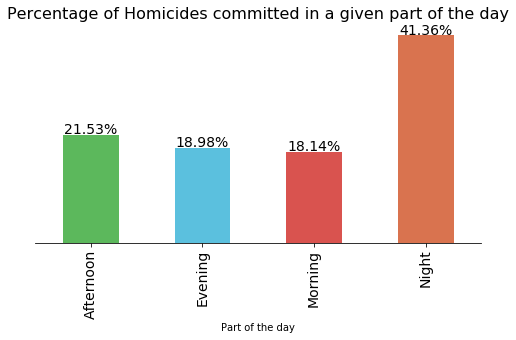

In [15]:
%matplotlib inline 

import matplotlib as mpl

color_list =['#5cb85c','#5bc0de','#d9534f','#d9734f']

ax=time_partofday['Percentage'].plot(kind="bar",figsize=(8, 4),width =0.5,color=color_list,fontsize=14)
ax.set_title("Percentage of Homicides committed in a given part of the day",fontsize=16 )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_visible(False)

for i in ax.patches:
    ax.annotate('{:.2f}%'.format(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points',fontsize=14)

In [16]:
def Crime_rate(c):  #function to show top 15 comunity area with the highest crime rate
    df = c.copy()
    df_n= df[['Community Area','Community Area Description',"Case Number",'Community Area Population']].groupby(['Community Area']+['Community Area Description']+['Community Area Population'], as_index=False).count() #group by community area
    df_n['Crime Rate']= round(df_n['Case Number']/(df_n['Community Area Population'])*1000,2)
    
    #there was an overrepresentation of sparsely populated community areas so the crime rate was normalized based on total crimes and crime rate.
    df_n['Crime Rate Normalized']= round(((df_n['Case Number']-df_n['Case Number'].min())/(df_n['Case Number'].max()-df_n['Case Number'].min())+(df_n['Crime Rate']-df_n['Crime Rate'].min())/(df_n['Crime Rate'].max()-df_n['Crime Rate'].min()))/2,2)
    df_n.columns=["Community Area",'Community Area Description','Community Area Population','Number of Crimes','Crime Rate','Crime Rate Normalized']
    return df_n.sort_values('Crime Rate Normalized',ascending=False)

crime_rate_total =Crime_rate(total) #call a function

crime_rate_total= crime_rate_total.reset_index(drop=True)
crime_rate_total.index = np.arange(1, len(crime_rate_total) + 1) #start indexing from 1
crime_rate_total['Community Area']= crime_rate_total['Community Area'].astype('int32')

crime_rate_total.head(15)

,Community Area,Community Area Description,Community Area Population,Number of Crimes,Crime Rate,Crime Rate Normalized
1,8,Near North Side,8484,12823,1511.43,0.82
2,27,East Garfield Park,2567,4879,1900.66,0.66
3,68,Englewood,3654,6172,1689.11,0.65
4,25,Austin,98514,14945,151.70,0.53
5,32,Loop,29283,10666,364.24,0.45
6,29,North Lawndale,35912,9234,257.13,0.37
7,28,Near West Side,54881,9255,168.64,0.35
8,43,South Shore,49767,8586,172.52,0.32
9,23,Humboldt Park,56323,7979,141.67,0.29
10,45,Avalon Park,1185,1150,970.46,0.28


In [17]:
crime_rate_homicide =Crime_rate(homicide) ##call a function
crime_rate_homicide= crime_rate_homicide.reset_index(drop=True)
crime_rate_homicide.index = np.arange(1, len(crime_rate_homicide) + 1) #start indexing from 1

crime_rate_homicide.rename(columns={'Number of Crimes':'Number of Homicides'},inplace=True)
crime_rate_homicide['Community Area']= crime_rate_homicide['Community Area'].astype('int32')

crime_rate_homicide.head(15)


,Community Area,Community Area Description,Community Area Population,Number of Homicides,Crime Rate,Crime Rate Normalized
1,68,Englewood,3654,33,9.03,0.79
2,27,East Garfield Park,2567,22,8.57,0.67
3,25,Austin,98514,56,0.57,0.53
4,29,North Lawndale,35912,32,0.89,0.33
5,26,West Garfield Park,18001,26,1.44,0.31
6,53,West Pullman,29651,26,0.88,0.27
7,43,South Shore,49767,25,0.50,0.24
8,61,New City,44377,23,0.52,0.23
9,67,West Englewood,35505,23,0.65,0.23
10,71,Auburn Gresham,48743,23,0.47,0.22


In [18]:
crime_total_index = pd.DataFrame(crime_rate_total.index.values.astype(int).tolist()) #return an index in total crime
crime_total_index.index = np.arange(1, len(crime_total_index) + 1)


crime_total_index= pd.merge(crime_rate_total['Community Area'],crime_total_index,how="inner",left_index=True, right_index=True)  #
crime_total_index.columns=['Community Area',"Postion in Total Crimes"]

crime_total_index= crime_total_index.reset_index(drop=True)
crime_total_index.index = np.arange(1, len(crime_total_index) + 1) 

crime_rate_homicide = pd.merge(crime_rate_homicide,crime_total_index,on="Community Area",how='left',right_index=False,left_index=False) #Add postion in crime_rate_total

crime_rate_homicide= crime_rate_homicide.reset_index(drop=True)
crime_rate_homicide.index = np.arange(1, len(crime_rate_homicide) + 1)
crime_rate_homicide['Community Area']= crime_rate_homicide['Community Area'].astype('int32')

crime_rate_homicide.head(15)

,Community Area,Community Area Description,Community Area Population,Number of Homicides,Crime Rate,Crime Rate Normalized,Postion in Total Crimes
1,68,Englewood,3654,33,9.03,0.79,3
2,27,East Garfield Park,2567,22,8.57,0.67,2
3,25,Austin,98514,56,0.57,0.53,4
4,29,North Lawndale,35912,32,0.89,0.33,6
5,26,West Garfield Park,18001,26,1.44,0.31,15
6,53,West Pullman,29651,26,0.88,0.27,25
7,43,South Shore,49767,25,0.50,0.24,8
8,61,New City,44377,23,0.52,0.23,27
9,67,West Englewood,35505,23,0.65,0.23,11
10,71,Auburn Gresham,48743,23,0.47,0.22,12


In [19]:
from sklearn.cluster import KMeans 

kclusters = 4

crime_rate_homicide_cluster = crime_rate_homicide.drop(['Community Area','Community Area Description','Community Area Population','Number of Homicides','Crime Rate','Postion in Total Crimes'], axis=1)

#run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(crime_rate_homicide_cluster)

crime_rate_homicide.insert(7, 'Community Area Homicide Cluster', kmeans.labels_) #assign a cluster to crime rate homicide
crime_rate_homicide.head(15)

,Community Area,Community Area Description,Community Area Population,Number of Homicides,Crime Rate,Crime Rate Normalized,Postion in Total Crimes,Community Area Homicide Cluster
1,68,Englewood,3654,33,9.03,0.79,3,1
2,27,East Garfield Park,2567,22,8.57,0.67,2,1
3,25,Austin,98514,56,0.57,0.53,4,1
4,29,North Lawndale,35912,32,0.89,0.33,6,3
5,26,West Garfield Park,18001,26,1.44,0.31,15,3
6,53,West Pullman,29651,26,0.88,0.27,25,3
7,43,South Shore,49767,25,0.50,0.24,8,3
8,61,New City,44377,23,0.52,0.23,27,3
9,67,West Englewood,35505,23,0.65,0.23,11,3
10,71,Auburn Gresham,48743,23,0.47,0.22,12,3


In [20]:
label_sorted = crime_rate_homicide.groupby('Community Area Homicide Cluster',as_index=False)['Crime Rate Normalized'].min() 
label_sorted =label_sorted.sort_values('Crime Rate Normalized') 
label_sorted = label_sorted.reset_index(drop=True)
label_sorted['label_new'] = label_sorted.index.values.astype(int)

my_dict = dict(zip(label_sorted['Community Area Homicide Cluster'], label_sorted['label_new']))

crime_rate_homicide['Community Area Homicide Cluster'].replace(my_dict, inplace=True) #assign a cluster in descending order
crime_rate_homicide.head(15)
    

,Community Area,Community Area Description,Community Area Population,Number of Homicides,Crime Rate,Crime Rate Normalized,Postion in Total Crimes,Community Area Homicide Cluster
1,68,Englewood,3654,33,9.03,0.79,3,3
2,27,East Garfield Park,2567,22,8.57,0.67,2,3
3,25,Austin,98514,56,0.57,0.53,4,3
4,29,North Lawndale,35912,32,0.89,0.33,6,2
5,26,West Garfield Park,18001,26,1.44,0.31,15,2
6,53,West Pullman,29651,26,0.88,0.27,25,2
7,43,South Shore,49767,25,0.50,0.24,8,2
8,61,New City,44377,23,0.52,0.23,27,2
9,67,West Englewood,35505,23,0.65,0.23,11,2
10,71,Auburn Gresham,48743,23,0.47,0.22,12,2


In [21]:
crime_rate_homicide_labeled= crime_rate_homicide.drop(['Community Area Description','Community Area Population','Crime Rate Normalized','Postion in Total Crimes','Number of Homicides','Crime Rate'],axis=1)
homicide_clustered = pd.merge(homicide,crime_rate_homicide_labeled, on='Community Area',how='left')
homicide_clustered.head()

,Case Number,Season,Part of the day,Primary Type,Description,Block,Location Description,Arrest,Beat,District,Community Area,Community Area Description,Community Area Population,Latitude,Longitude,Community Area Homicide Cluster
0,JB573872,Winter,Afternoon,HOMICIDE,FIRST DEGREE MURDER,002XX W 95TH ST,STREET,False,634,6,49,Roseland,44619,41.721658,-87.628972,2
1,JB573562,Winter,Morning,HOMICIDE,FIRST DEGREE MURDER,003XX E 53RD ST,STREET,True,231,2,40,Washington Park,11717,41.798450,-87.616858,1
2,JB572372,Winter,Morning,HOMICIDE,FIRST DEGREE MURDER,066XX S LAFLIN ST,ABANDONED BUILDING,True,725,7,67,West Englewood,35505,41.773350,-87.661613,2
3,JB567847,Winter,Afternoon,HOMICIDE,FIRST DEGREE MURDER,057XX W 64TH PL,HOUSE,True,812,8,64,Clearing,23139,41.775264,-87.765095,0
4,JB566817,Winter,Afternoon,HOMICIDE,FIRST DEGREE MURDER,024XX S WHIPPLE ST,STREET,False,1033,10,30,South Lawndale,79288,41.847238,-87.701441,1


In [22]:
import requests # library to handle requests
import json  # library to handle JSON files
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge geopy --yes
#!conda install -c conda-forge folium=0.5.0 --yes

import folium


In [23]:
#Define Foursquare Credentials and Version

CLIENT_ID = 'UVUPNKQFXVXGHR4AIFDD1VE0SSSOTE4PMMXA4YHE5DU2PGM3' # your Foursquare ID
CLIENT_SECRET = 'DGYWCZPPLVFAHHN1QMCCPFVXHNYME11ZU5HVTXWBVLC3E2FJ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 20

In [24]:
# Search police departments nearby the crime site

def getNearbyPolice(cases, latitudes, longitudes, radius=5000,search_query = 'Police'):
    
    police_departments=[]
    for case, lat, lng in zip(cases, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng, 
            VERSION,
            search_query,
            radius,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby venue
        police_departments.append([(
            case, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng']) for v in results])

    nearby_police = pd.DataFrame([item for police in police_departments for item in police])
    nearby_police.columns =['Case Number','Latitude','Longitude','Police Department','Latitude Police','Longitude Police']
    
    return(nearby_police)

In [25]:
chicago_police = getNearbyPolice( cases=homicide_clustered['Case Number'],
                                   latitudes=homicide_clustered['Latitude'],
                                   longitudes=homicide_clustered['Longitude']
                                  )


In [26]:
chicago_police.head()

,Case Number,Latitude,Longitude,Police Department,Latitude Police,Longitude Police
0,JB573872,41.721658,-87.628972,Chicago Police Department - 4th District,41.707732,-87.585895
1,JB573872,41.721658,-87.628972,Chicago Police Station 3rd District,41.766998,-87.605839
2,JB573872,41.721658,-87.628972,Chicago Police 22nd District,41.691507,-87.668432
3,JB573872,41.721658,-87.628972,Chicago Police Department - District 6,41.751796,-87.644123
4,JB573872,41.721658,-87.628972,Chicago Police Department 5th District,41.692799,-87.604573


In [27]:

from geopy.distance import geodesic  #Define the distance between police station and crime site
Distance=[]
for lat1,lng1,lat2,lng2 in zip(chicago_police['Latitude'],chicago_police['Longitude'],chicago_police['Latitude Police'],chicago_police['Longitude Police']):
                                                                                                                                        coords_1 = (lat1, lng1)
                                                                                                                                        coords_2 = (lat2, lng2)
                                                                                                                                        Distance.append(round(geodesic(coords_1, coords_2).m,0))
chicago_police['Distance [m]'] = Distance

In [28]:
chicago_police.head()

,Case Number,Latitude,Longitude,Police Department,Latitude Police,Longitude Police,Distance [m]
0,JB573872,41.721658,-87.628972,Chicago Police Department - 4th District,41.707732,-87.585895,3904.0
1,JB573872,41.721658,-87.628972,Chicago Police Station 3rd District,41.766998,-87.605839,5391.0
2,JB573872,41.721658,-87.628972,Chicago Police 22nd District,41.691507,-87.668432,4690.0
3,JB573872,41.721658,-87.628972,Chicago Police Department - District 6,41.751796,-87.644123,3577.0
4,JB573872,41.721658,-87.628972,Chicago Police Department 5th District,41.692799,-87.604573,3794.0


In [29]:
chicago_police.shape

(9727, 7)

In [30]:
chicago_police_grouped = chicago_police.groupby(['Case Number'],as_index=False)['Distance [m]'].min() #find the nearest police department
chicago_police_grouped.head()

,Case Number,Distance [m]
0,D439410,3204.0
1,F780368,778.0
2,HS260050,2034.0
3,HW249839,759.0
4,HY370531,535.0


In [31]:
mclusters = 4

#run k-means clustering

chicago_police_cluster= chicago_police_grouped.drop('Case Number',axis=1)
kmeans = KMeans(n_clusters=mclusters, random_state=0).fit(chicago_police_cluster)

chicago_police_grouped.insert(2, 'Police Department Cluster', kmeans.labels_) #assign a cluster to case number based on desitance to Police Department
chicago_police_grouped.head()

,Case Number,Distance [m],Police Department Cluster
0,D439410,3204.0,3
1,F780368,778.0,0
2,HS260050,2034.0,1
3,HW249839,759.0,0
4,HY370531,535.0,0


In [32]:
chicago_police_grouped.shape

(567, 3)

In [33]:
chicago_police_grouped_cluster = chicago_police_grouped.groupby('Police Department Cluster',as_index=False).agg(min_Distance=('Distance [m]', min),max_Distance=('Distance [m]', max))
chicago_police_grouped_cluster['Police Department Cluster'] = chicago_police_grouped_cluster.index.values.astype(int)

label_police = chicago_police_grouped_cluster.sort_values('min_Distance') 
label_police = label_police.reset_index(drop=True)
label_police['Police Department Cluster new'] = label_police.index.values.astype(int)

my_dict = dict(zip(label_police['Police Department Cluster'], label_police['Police Department Cluster new']))
chicago_police_grouped['Police Department Cluster'].replace(my_dict, inplace=True) #assign a cluster in descending order

label_police 

,min_Distance,max_Distance,Police Department Cluster,Police Department Cluster new
0,28.0,941.0,0,0
1,955.0,1646.0,2,1
2,1665.0,2412.0,1,2
3,2460.0,4123.0,3,3


In [34]:
chicago_police_grouped.head()

,Case Number,Distance [m],Police Department Cluster
0,D439410,3204.0,3
1,F780368,778.0,0
2,HS260050,2034.0,2
3,HW249839,759.0,0
4,HY370531,535.0,0


In [35]:
homicide_clustered_final = pd.merge(homicide_clustered,chicago_police_grouped,on="Case Number",how='left')
homicide_clustered_final.head()

,Case Number,Season,Part of the day,Primary Type,Description,Block,Location Description,Arrest,Beat,District,Community Area,Community Area Description,Community Area Population,Latitude,Longitude,Community Area Homicide Cluster,Distance [m],Police Department Cluster
0,JB573872,Winter,Afternoon,HOMICIDE,FIRST DEGREE MURDER,002XX W 95TH ST,STREET,False,634,6,49,Roseland,44619,41.721658,-87.628972,2,2685.0,3
1,JB573562,Winter,Morning,HOMICIDE,FIRST DEGREE MURDER,003XX E 53RD ST,STREET,True,231,2,40,Washington Park,11717,41.798450,-87.616858,1,1108.0,1
2,JB572372,Winter,Morning,HOMICIDE,FIRST DEGREE MURDER,066XX S LAFLIN ST,ABANDONED BUILDING,True,725,7,67,West Englewood,35505,41.773350,-87.661613,2,700.0,0
3,JB567847,Winter,Afternoon,HOMICIDE,FIRST DEGREE MURDER,057XX W 64TH PL,HOUSE,True,812,8,64,Clearing,23139,41.775264,-87.765095,0,486.0,0
4,JB566817,Winter,Afternoon,HOMICIDE,FIRST DEGREE MURDER,024XX S WHIPPLE ST,STREET,False,1033,10,30,South Lawndale,79288,41.847238,-87.701441,1,1197.0,1


In [36]:
homicide_clustered_final.shape

(590, 18)

In [37]:
#The json file is based on zip-code so community areas need to be mapped to zip-codes
zip_code = pd.read_csv('Zip code.csv')  #https://github.com/piotr-ek7/Coursera_Capstone/blob/master/Zip%20code.csv
zip_code  = pd.merge(zip_code,crime_rate_homicide,on='Community Area',how='inner')
zip_code = zip_code .drop(['Community Area Population','Number of Homicides','Crime Rate','Crime Rate Normalized','Postion in Total Crimes'],axis=1)
zip_code = zip_code.sort_values('Community Area Homicide Cluster',ascending=False)
zip_code['Zip code'] = zip_code['Zip code'].astype(str)
zip_code.head()

,Zip code,Community Area,Community Area Description,Community Area Homicide Cluster
105,60624,27,East Garfield Park,3
192,60636,68,Englewood,3
98,60639,25,Austin,3
99,60644,25,Austin,3
100,60651,25,Austin,3


In [38]:
zip_code.shape

(210, 4)

In [39]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim 

address = 'Chicago,Illinois'

geolocator = Nominatim(user_agent="foursquare_agent") #locate Chicago
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

#!wget --quiet https://raw.githubusercontent.com/piotr-ek7/Coursera_Capstone/master/Chicago.geojson #source https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6

chicago_geo = r'chicago_n.json'

map_clusters.choropleth(
    geo_data=chicago_geo,
    data = zip_code,
    columns = ['Zip code','Community Area Homicide Cluster'],
    key_on='feature.properties.ZIP',
    fill_color='YlOrRd',
    fill_opacity=0.5, 
    line_opacity=0.5,
    legend_name='Community Area Homicide Cluster') 

# set color scheme for the clusters
color_list ={0:'#63a61b',1:'#f5e211',2:'#ff6f00',3:'#ff0000'}

# add markers to the map
markers_colors = []
for lat, lon, cn, cluster in zip(homicide_clustered_final['Latitude'], homicide_clustered_final['Longitude'], homicide_clustered_final['Case Number'], homicide_clustered_final['Police Department Cluster']):
    label = folium.Popup('Case number- '+str(cn) + ', Police Department Cluster - ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=color_list[cluster],
        fill=True,
        fill_color=color_list[cluster],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

In [40]:
final = pd.DataFrame(homicide_clustered_final.groupby(['Community Area Homicide Cluster','Police Department Cluster'])['Case Number'].count())
final

Case Number
Community Area Homicide Cluster Police Department Cluster             
0                               0                                   33
                                1                                   28
                                2                                   24
                                3                                    8
1                               0                                   50
                                1                                   50
                                2                                   20
                                3                                    8
2                               0                                   55
                                1                                   96
                                2                                   78
                                3                                   29
3                               0                                   34
                                1                                   47
                                2                                   30

In [41]:
final_police_32 = pd.DataFrame(homicide_clustered_final['Block'][(homicide_clustered_final['Community Area Homicide Cluster']==3) & (homicide_clustered_final['Police Department Cluster']==2)].unique())
final_police_32= final_police_32.reset_index(drop=True)
final_police_32.columns = ['Block']
final_police_32

,Block
0,048XX W QUINCY ST
1,055XX W THOMAS ST
2,016XX N CICERO AVE
3,010XX N LEAMINGTON AVE
4,048XX W GLADYS AVE
5,011XX N LONG AVE
6,051XX W THOMAS ST
7,048XX W HIRSCH ST
8,047XX W HARRISON ST
9,070XX S SANGAMON ST


In [42]:
final_police_23 = pd.DataFrame(homicide_clustered_final['Block'][(homicide_clustered_final['Community Area Homicide Cluster']==2) & (homicide_clustered_final['Police Department Cluster']==3)].unique())
final_police_23= final_police_23.reset_index(drop=True)
final_police_23.columns = ['Block']
final_police_23

,Block
0,002XX W 95TH ST
1,012XX N KILDARE AVE
2,008XX N HARDING AVE
3,119XX S LA SALLE ST
4,111XX S NORMAL AVE
5,007XX N SPRINGFIELD AVE
6,042XX W AUGUSTA BLVD
7,045XX W ADAMS ST
8,044XX W WEST END AVE
9,073XX S CLAREMONT AVE


In [43]:
final_police_Map_3 = pd.DataFrame(homicide_clustered_final['Block'][(homicide_clustered_final['Community Area Description']=='Humboldt Park ')& (homicide_clustered_final['Police Department Cluster']==3)].unique())
final_police_Map_3= final_police_Map_3.reset_index(drop=True)
final_police_Map_3.columns = ['Block']
final_police_Map_3

,Block
0,012XX N KILDARE AVE
1,008XX N HARDING AVE
2,007XX N SPRINGFIELD AVE
3,042XX W AUGUSTA BLVD
4,012XX N KEELER AVE
5,041XX W POTOMAC AVE
6,009XX N KEDVALE AVE
7,013XX N KILDARE AVE
8,042XX W HADDON AVE
9,010XX N PULASKI RD


In [44]:
final_police_Map1_3 = pd.DataFrame(homicide_clustered_final['Block'][(homicide_clustered_final['Community Area Description']=='Washington Heights ')& (homicide_clustered_final['Police Department Cluster']==3)].unique())
final_police_Map1_3= final_police_Map1_3.reset_index(drop=True)
final_police_Map1_3.columns = ['Block']
final_police_Map1_3

,Block
0,014XX W 91ST ST
1,012XX W 96TH ST
2,102XX S EGGLESTON AVE
3,091XX S ABERDEEN ST
4,095XX S VINCENNES AVE
